In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv('SalaryData_Train.csv')

In [12]:
data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [23]:
#New df just in case
df = pd.DataFrame(data)

# Define age groups
bins = [-1, 18, 24, 50, float('inf')]  # Age groups boundaries
labels = ['Children and teenagers', 'Young adults', 'Adults', 'Seniors']  # Labels for age groups

# Add a new column with age groups
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

# Group by age group and count
grouped = df.groupby(['age_group','education','maritalstatus','race','sex','occupation','relationship','native','Salary'],observed=False).size()

# Or if you want to group by another column and count within each age group
# For example, if you have a column called 'category'
# grouped = df.groupby(['age_group', 'category']).size()

print(grouped)


age_group               education      maritalstatus  race                 sex      occupation         relationship  native          Salary
Children and teenagers   10th           Divorced       Amer-Indian-Eskimo   Female   Adm-clerical       Husband       Cambodia        <=50K    0
                                                                                                                                      >50K     0
                                                                                                                      Canada          <=50K    0
                                                                                                                                      >50K     0
                                                                                                                      China           <=50K    0
                                                                                                                                       

## Plotting a combination of categories wrt to the age group

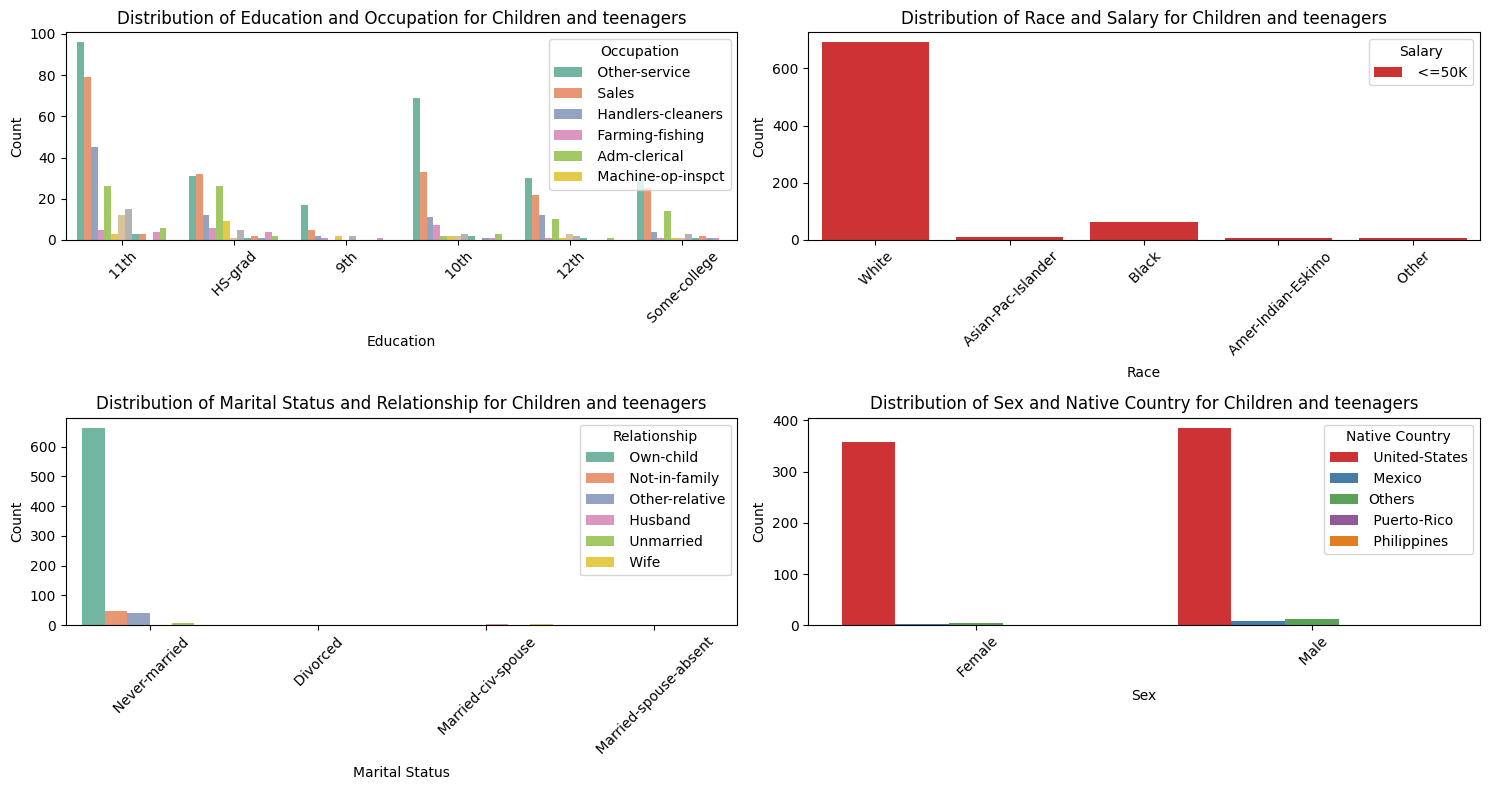

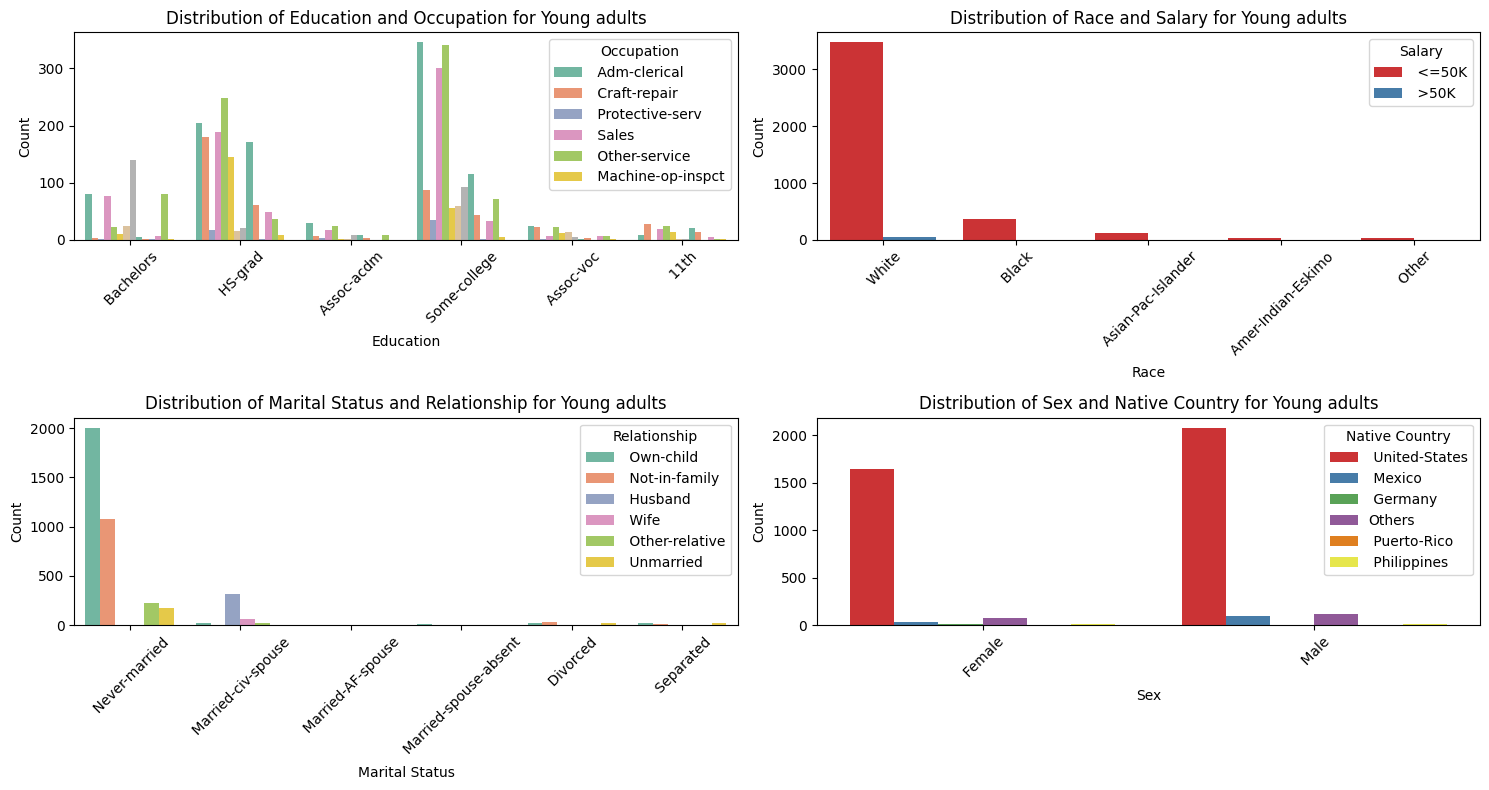

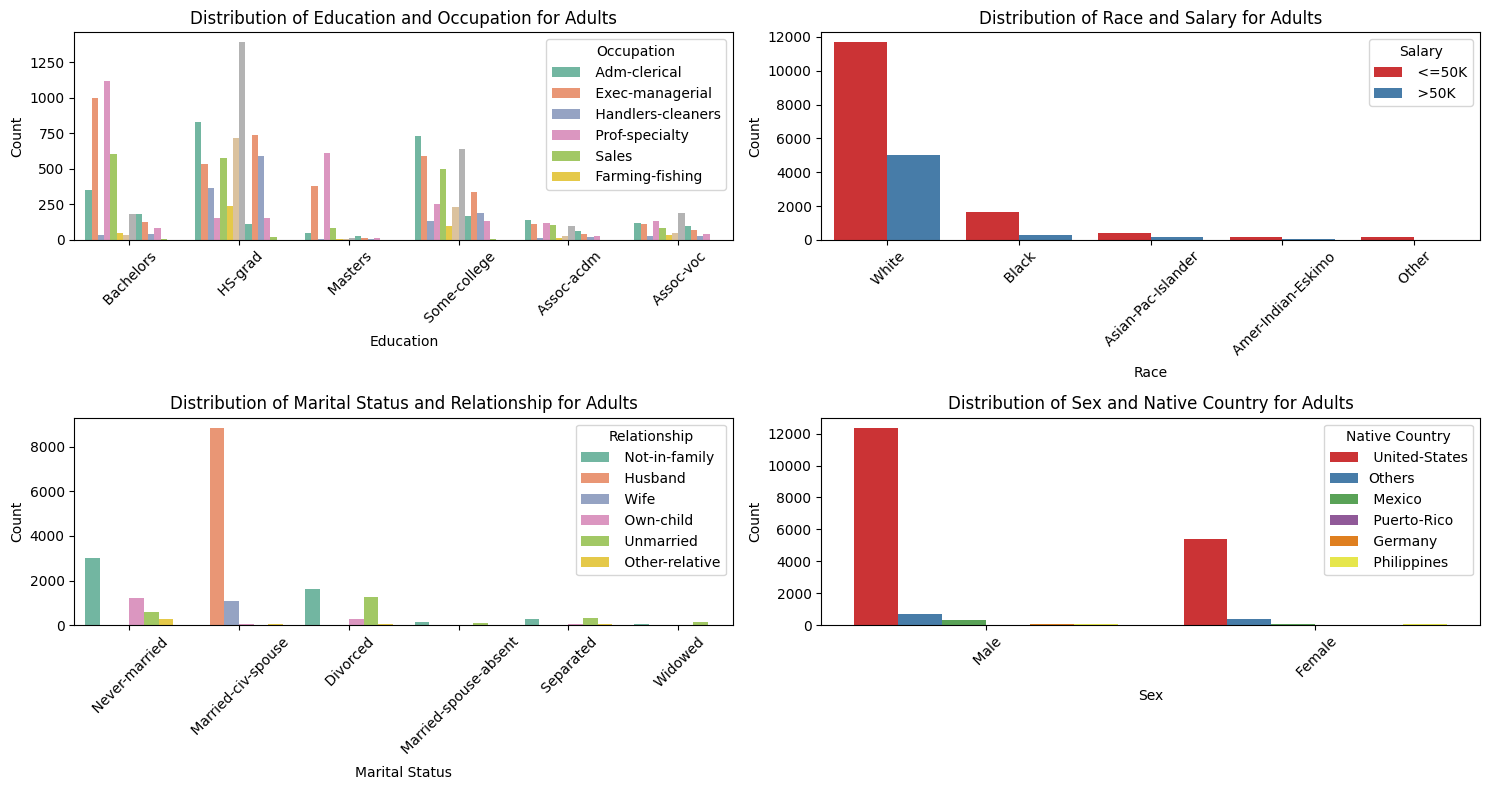

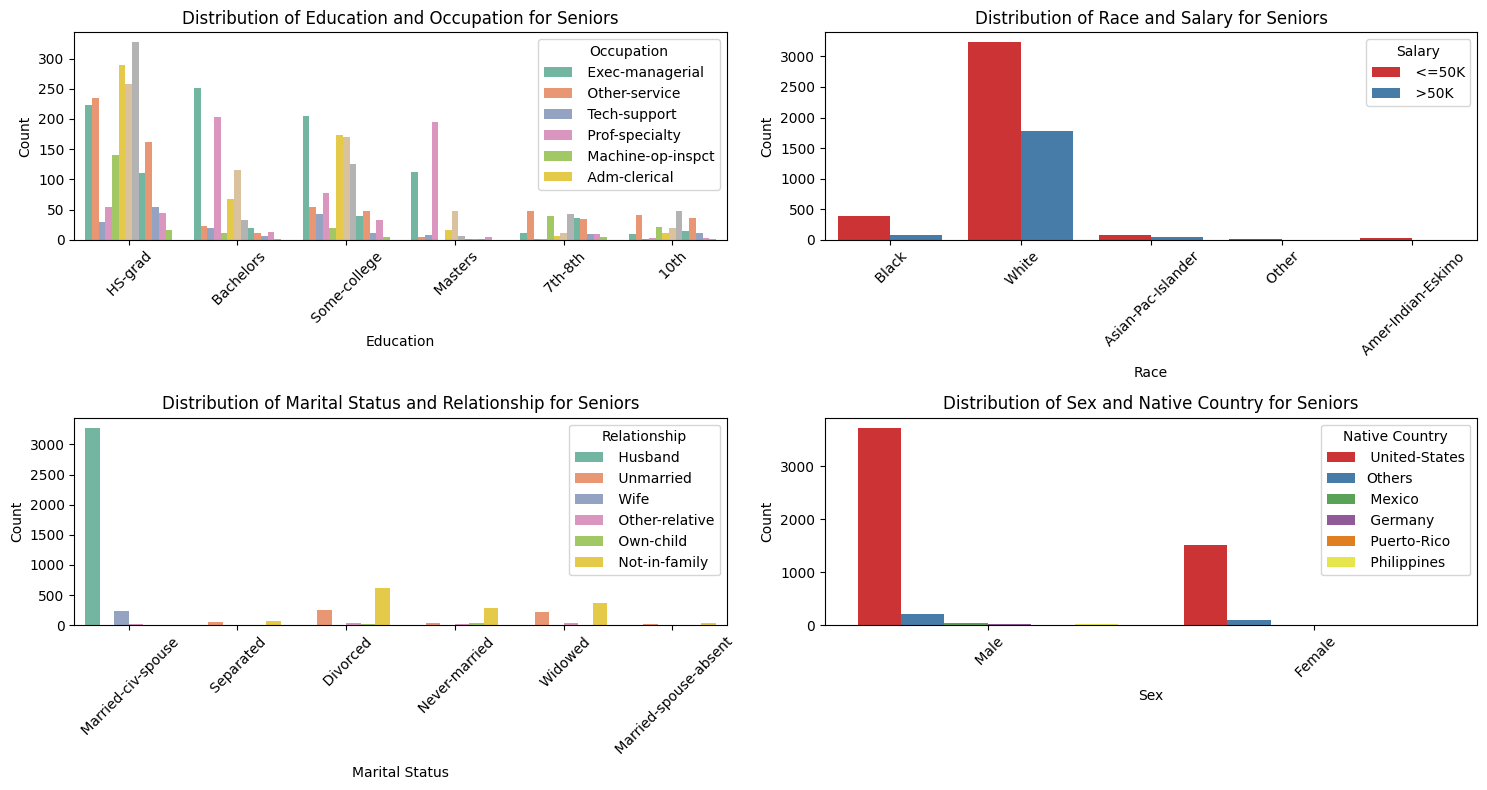

In [30]:
df = pd.DataFrame(data)

# Define age groups
bins = [-1, 18, 24, 50, float('inf')]  # Age groups boundaries
labels = ['Children and teenagers', 'Young adults', 'Adults', 'Seniors']  # Labels for age groups

# Add a new column with age groups
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

# Trim 'native' column based on count of people
threshold = 6  # Set the threshold count for top countries
top_countries = df['native'].value_counts().nlargest(threshold).index.tolist()
df.loc[~df['native'].isin(top_countries), 'native'] = 'Others'

# Plotting for each age group
for age_group in labels:
    plt.figure(figsize=(15, 8))
    
    # Education and Occupation
    plt.subplot(2, 2, 1)
    top_educations = df[df['age_group'] == age_group]['education'].value_counts().nlargest(threshold).index.tolist()
    ax = sns.countplot(data=df.loc[(df['age_group'] == age_group) & (df['education'].isin(top_educations))], x='education', hue='occupation', palette='Set2')
    plt.title(f'Distribution of Education and Occupation for {age_group}')
    plt.xlabel('Education')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[:threshold], labels[:threshold], title='Occupation')
    
    # Race and Salary
    plt.subplot(2, 2, 2)
    top_races = df[df['age_group'] == age_group]['race'].value_counts().nlargest(threshold).index.tolist()
    ax = sns.countplot(data=df.loc[(df['age_group'] == age_group) & (df['race'].isin(top_races))], x='race', hue='Salary', palette='Set1')
    plt.title(f'Distribution of Race and Salary for {age_group}')
    plt.xlabel('Race')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[:threshold], labels[:threshold], title='Salary')
    
    # Marital Status and Relationship
    plt.subplot(2, 2, 3)
    top_maritalstatus = df[df['age_group'] == age_group]['maritalstatus'].value_counts().nlargest(threshold).index.tolist()
    ax = sns.countplot(data=df.loc[(df['age_group'] == age_group) & (df['maritalstatus'].isin(top_maritalstatus))], x='maritalstatus', hue='relationship', palette='Set2')
    plt.title(f'Distribution of Marital Status and Relationship for {age_group}')
    plt.xlabel('Marital Status')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[:threshold], labels[:threshold], title='Relationship')
    
    # Sex and Native Country
    plt.subplot(2, 2, 4)
    top_sex = df[df['age_group'] == age_group]['sex'].value_counts().nlargest(threshold).index.tolist()
    ax = sns.countplot(data=df.loc[(df['age_group'] == age_group) & (df['sex'].isin(top_sex))], x='sex', hue='native', palette='Set1')
    plt.title(f'Distribution of Sex and Native Country for {age_group}')
    plt.xlabel('Sex')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[:threshold], labels[:threshold], title='Native Country')
    
    plt.tight_layout()
    plt.show()


## Observations for the combination of categories ->
### Children and teenagers->
    # 1) Most of the children and teens are in other service i.e not working, but there are some who are doing sales maybe because of their family business
    # 2) Most of the Children and teens are from US and are white
### Young Adults->
    # 1) Most of the YA are doing clerical role and are from some college this implies some internship or some low pay work
    # 2) Most of them have a Salary below 50k and are non married individuals
### Adults->
    #1) Most of the Count is from HS grad and are staring to work jobs such as handlers and cleaners, sales, professionals 
    #2) A lot of them are males and are married, here we get to see the amount of salary few of them earn is more than 50k
### Seniors->
    #1) The Count of Males is relatively high for seniors as compared to males
    #2) Most of them are White and are Married 
    #3) At this age group we see the maximum jobs are management and support
### The count of white Males & Females is maximum in this data sample

In [60]:
data.Salary.value_counts()

Salary
 <=50K    11360
 >50K      3700
Name: count, dtype: int64

In [61]:
#We dont need to do train test split as there is already a test data seperate to this what we can do is apply validation on this data

In [62]:
data.describe()[1::4]
#capital gain and capital loss are skewed as their mean and median are not similar


,age,educationno,capitalgain,capitalloss,hoursperweek
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
50%,37.000000,10.000000,0.000000,0.000000,40.000000


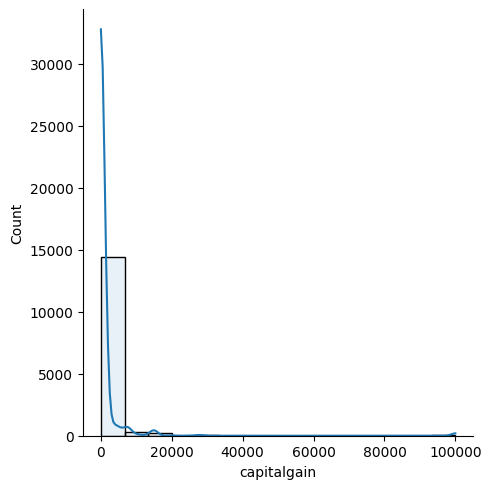

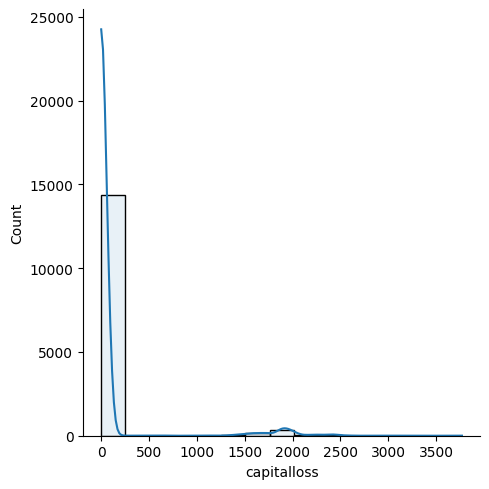

In [63]:
sns.displot(data=data.capitalgain,alpha=0.1,kde=True)
sns.displot(data=data.capitalloss,alpha=0.1,kde=True)
# both of them are right skewed as there are outliers in the data either we remove the outliers or treat them

<Axes: ylabel='capitalgain'>

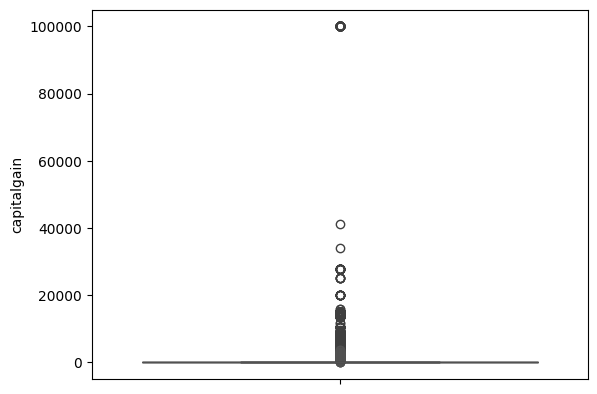

In [64]:
sns.boxplot(data.capitalgain)
sns.boxplot(data.capitalloss)

In [65]:
# Identifying the outliers

# Calculate Q1 and Q3
Q1 = data.capitalgain.quantile(0.25)
Q3 = data.capitalgain.quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

print("Interquartile Range (IQR) for", 'capitalgain', ":", IQR)
outliers = ((data.capitalgain < (Q1 - 1.5 * IQR)) | (data.capitalgain > (Q3 + 1.5 * IQR)))


Interquartile Range (IQR) for capitalgain : 0.0


In [66]:
#Outliers
data.capitalgain[outliers].value_counts().sort_index(ascending=True)

#what i can do with 99999 is that i can winsorize the data such that the upper limit is 40000 and lower limit is 100
#Out of 30k 2.5k are outliers

capitalgain
114       2
401       1
594      14
914       2
991       1
         ..
25236     3
27828    24
34095     1
41310     1
99999    81
Name: count, Length: 109, dtype: int64

In [67]:
from scipy.stats.mstats import winsorize
upperlimit=0.9
lowerlimit=None

winsorized_data = winsorize(data.capitalgain[outliers], limits=[lowerlimit,upperlimit])


In [68]:
data.capitalgain[outliers].index

Index([    3,     5,     8,    11,    20,    25,    41,    47,    51,    52,
       ...
       14969, 14980, 14992, 15007, 15018, 15022, 15026, 15033, 15042, 15058],
      dtype='int64', length=1252)

In [69]:
pd.Series(winsorized_data.data).values

array([2354, 2354, 2354, ..., 2354, 2354, 2354])

In [70]:
data[data.capitalgain==99999]
#148 values are 99999 
#these are all big outliers

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
318,39,Private,HS-grad,9,Divorced,Exec-managerial,Unmarried,Black,Female,99999,0,40,United-States,>50K
328,50,Self-emp-not-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,80,United-States,>50K
384,54,Self-emp-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,40,United-States,>50K
636,41,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,55,United-States,>50K
645,43,State-gov,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,99999,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14051,32,Self-emp-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,60,United-States,>50K
14811,61,Self-emp-not-inc,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,30,United-States,>50K
14820,36,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,99999,0,45,United-States,>50K
14825,42,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,42,United-States,>50K


In [71]:
#Replacing outliers
data.loc[outliers, 'capitalgain']=winsorized_data

In [72]:
#Handled outliers
data.capitalgain.value_counts().sort_index(ascending=False)

capitalgain
2354     1129
2346        1
2329        1
2290        3
2202       12
2176        8
2174       26
2105        3
2062        1
2036        1
1848        3
1831        2
1797        3
1731        1
1506        9
1471        2
1455        2
1424        1
1409        2
1264        2
1173        1
1151        5
1086        4
1055       10
991         1
914         2
594        14
401         1
114         2
0       13808
Name: count, dtype: int64

In [73]:
# Identifying the outliers

# Calculate Q1 and Q3
Q1 = data.capitalloss.quantile(0.25)
Q3 = data.capitalloss.quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

print("Interquartile Range (IQR) for", 'capitalgain', ":", IQR)
outliers2 = ((data.capitalloss < (Q1 - 1.5 * IQR)) | (data.capitalloss > (Q3 + 1.5 * IQR)))


Interquartile Range (IQR) for capitalgain : 0.0


In [74]:
data.capitalloss[outliers2].count()
#Out of 30k 1.4k are outliers which can be easily handled with box cox


713

In [75]:
data.capitalgain.value_counts()
# out of 30k values 27.6k are 0's

capitalgain
0       13808
2354     1129
2174       26
594        14
2202       12
1055       10
1506        9
2176        8
1151        5
1086        4
2105        3
1848        3
2290        3
1797        3
914         2
1455        2
1471        2
1831        2
1264        2
114         2
1409        2
991         1
1173        1
401         1
2329        1
1731        1
2346        1
2062        1
1424        1
2036        1
Name: count, dtype: int64

## Either we have to remove the non 0's or treat the non 0's as 0's or what we can do is to do log transform and use np.log1p so that it will add 1 before doing log tranform to handle 0's in the data


In [76]:
#Transformation
np.log1p(data.capitalgain)

0        0.000000
1        0.000000
2        0.000000
3        7.764296
4        0.000000
           ...   
15055    0.000000
15056    0.000000
15057    0.000000
15058    7.764296
15059    0.000000
Name: capitalgain, Length: 15060, dtype: float64

In [77]:
np.log1p(data.capitalgain).skew()
#Log transform couldnt handle the transformation skewness

3.024567797472146

In [78]:
from scipy.stats import boxcox

# Assuming your data is in a column named 'your_column'
data1 = data.capitalgain
data2=data.capitalloss

# Apply Box-Cox transformation
data_transformed, lambda_value = boxcox(data1 + 1)
data_transformed2, lambda_value2 = boxcox(data2 + 1)

In [79]:
lambda_value,lambda_value2
#This indicates that box cox has applied a negetive power transformation and probably handles the skewness

(-1.558803437500972, -2.8088720512685894)

In [80]:
pd.Series(data_transformed)

0        0.000000
1        0.000000
2        0.000000
3        0.641514
4        0.000000
           ...   
15055    0.000000
15056    0.000000
15057    0.000000
15058    0.641514
15059    0.000000
Length: 15060, dtype: float64

In [81]:
pd.Series(data_transformed2)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
15055    0.0
15056    0.0
15057    0.0
15058    0.0
15059    0.0
Length: 15060, dtype: float64

In [82]:
data.capitalgain=data_transformed

In [83]:
data.capitalloss=data_transformed2

In [84]:
data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.000000,0.0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.000000,0.0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0.000000,0.0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0.641514,0.0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0.000000,0.0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0.000000,0.0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0.000000,0.0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.000000,0.0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,0.641514,0.0,40,United-States,<=50K


In [85]:
data.Salary.value_counts()
#Lets make salary <=50k as 0 and >50k as 1

Salary
 <=50K    11360
 >50K      3700
Name: count, dtype: int64

In [86]:
data.Salary[data['Salary'].astype(str).str.contains("<=50K")]


0         <=50K
1         <=50K
4         <=50K
6         <=50K
7         <=50K
          ...  
15054     <=50K
15055     <=50K
15056     <=50K
15057     <=50K
15058     <=50K
Name: Salary, Length: 11360, dtype: object

## 0 in salary represents <=50k and 1 represents >50k

In [87]:
data['Salary_binary'] = np.where(data['Salary'].astype(str).str.contains("<=50K"), 0, 1)


In [88]:
data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary,Salary_binary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.000000,0.0,40,United-States,<=50K,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.000000,0.0,50,United-States,<=50K,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0.000000,0.0,40,United-States,>50K,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0.641514,0.0,40,United-States,>50K,1
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0.000000,0.0,30,United-States,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0.000000,0.0,40,United-States,<=50K,0
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0.000000,0.0,36,United-States,<=50K,0
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.000000,0.0,50,United-States,<=50K,0
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,0.641514,0.0,40,United-States,<=50K,0


In [89]:
data.drop('Salary',axis=1,inplace=True)

# Cleaning the categories to become more representative of the data

In [90]:
data.dtypes[data.dtypes=='object'].index

Index(['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
       'race', 'sex', 'native'],
      dtype='object')

In [91]:
data.workclass.value_counts()
#What we can do is merge the work class of all type of govts in a single category named Govt.
# We can also merge Self emp into 1 which is Self-emp
#Other will be called Non-Working

workclass
 Private             11021
 Self-emp-not-inc     1297
 Local-gov            1033
 State-gov             667
 Self-emp-inc          572
 Federal-gov           463
 Without-pay             7
Name: count, dtype: int64

In [92]:
category_mapping = {
    'Private': 'Private',
    'Self-emp-not-inc': 'Self-emp',
    'Local-gov': 'Govt',
    'State-gov': 'Govt',
    'Self-emp-inc': 'Self-emp',
    'Federal-gov': 'Govt',
    'Without-pay': 'Non-Working'
}

data['workclass'] = data['workclass'].str.strip().replace(category_mapping)

# Display the value counts for the column
print(data['workclass'].value_counts())

workclass
Private        11021
Govt            2163
Self-emp        1869
Non-Working        7
Name: count, dtype: int64


In [93]:
data.education.value_counts()

education
 HS-grad         4943
 Some-college    3221
 Bachelors       2526
 Masters          887
 Assoc-voc        652
 11th             571
 Assoc-acdm       499
 10th             403
 7th-8th          266
 Prof-school      243
 9th              221
 12th             200
 Doctorate        169
 5th-6th          161
 1st-4th           71
 Preschool         27
Name: count, dtype: int64

In [94]:
    # People who are only educated till school level will be in one category.
    # Bachelors and Some College will be in one category.
    # Masters will be in one category.
    # Doctorate will be in one category.

In [95]:
# Mapping for grouped education categories
grouped_education_mapping = {
    'HS-grad': 'High School',
    'Some-college': 'Bachelors/Some College',
    'Bachelors': 'Bachelors/Some College',
    'Masters': 'Masters',
    'Assoc-voc': 'Associates',
    '11th': 'High School',
    'Assoc-acdm': 'Associates',
    '10th': 'High School',
    '7th-8th': 'High School',
    'Prof-school': 'Doctorate',
    '9th': 'High School',
    '12th': 'High School',
    'Doctorate': 'Doctorate',
    '5th-6th': 'High School',
    '1st-4th': 'High School',
    'Preschool': 'High School'
}
data['education']=data['education'].str.strip()

data['education'] = data['education'].replace(grouped_education_mapping, inplace=False)

# Display the value counts for the  column
print(data['education'].value_counts())


education
High School               6863
Bachelors/Some College    5747
Associates                1151
Masters                    887
Doctorate                  412
Name: count, dtype: int64


In [96]:
data.maritalstatus.value_counts()

maritalstatus
 Married-civ-spouse       6990
 Never-married            4872
 Divorced                 2083
 Separated                 472
 Widowed                   450
 Married-spouse-absent     182
 Married-AF-spouse          11
Name: count, dtype: int64

In [97]:
''' 
'Married' includes 'Married-civ-spouse', 'Married-spouse-absent', and 'Married-AF-spouse'.
'Single' includes 'Never-married'.
'Divorced' remains as is.
'Separated' remains as is.
'Widowed' remains as is.

'''


# Mapping for grouped marital status categories
grouped_marital_mapping = {
    'Married-civ-spouse': 'Married',
    'Never-married': 'Single',
    'Divorced': 'Divorced',
    'Separated': 'Separated',
    'Widowed': 'Widowed',
    'Married-spouse-absent': 'Married',
    'Married-AF-spouse': 'Married'
}

data['maritalstatus']=data['maritalstatus'].str.strip()


data['maritalstatus'] = data['maritalstatus'].replace(grouped_marital_mapping, inplace=False)

# Display the value counts for the new column
print(data['maritalstatus'].value_counts())


maritalstatus
Married      7183
Single       4872
Divorced     2083
Separated     472
Widowed       450
Name: count, dtype: int64


In [98]:
data.occupation.value_counts()

occupation
 Exec-managerial      1992
 Craft-repair         1990
 Prof-specialty       1970
 Sales                1824
 Adm-clerical         1819
 Other-service        1596
 Machine-op-inspct    1004
 Transport-moving      744
 Handlers-cleaners     696
 Tech-support          508
 Farming-fishing       491
 Protective-serv       332
 Priv-house-serv        89
 Armed-Forces            5
Name: count, dtype: int64

In [99]:
'''
Professional' includes 'Prof-specialty'.
'Skilled' includes 'Craft-repair', 'Machine-op-inspct', 'Transport-moving', and 'Farming-fishing'.
'Management' includes 'Exec-managerial'.
'Clerical' includes 'Adm-clerical'.
'Sales' remains as is.
'Service' includes 'Other-service', 'Handlers-cleaners', 'Protective-serv', and 'Priv-house-serv'.
'Technical' includes 'Tech-support'.
'Military' includes 'Armed-Forces'.

'''

# Mapping for grouped occupation categories
grouped_occupation_mapping = {
    'Prof-specialty': 'Professional',
    'Craft-repair': 'Skilled',
    'Exec-managerial': 'Management',
    'Adm-clerical': 'Clerical',
    'Sales': 'Sales',
    'Other-service': 'Service',
    'Machine-op-inspct': 'Skilled',
    'Transport-moving': 'Skilled',
    'Handlers-cleaners': 'Service',
    'Farming-fishing': 'Skilled',
    'Tech-support': 'Technical',
    'Protective-serv': 'Service',
    'Priv-house-serv': 'Service',
    'Armed-Forces': 'Military'
}

data['occupation']=data.occupation.str.strip()

data['occupation'] = data['occupation'].replace(grouped_occupation_mapping, inplace=False)

# Display the value counts for the  column
print(data['occupation'].value_counts())


occupation
Skilled         4229
Service         2713
Management      1992
Professional    1970
Sales           1824
Clerical        1819
Technical        508
Military           5
Name: count, dtype: int64


In [100]:
data.relationship.value_counts()
#as single also comes in not-in-family we can merge them

relationship
 Husband           6203
 Not-in-family     3976
 Own-child         2160
 Unmarried         1576
 Wife               685
 Other-relative     460
Name: count, dtype: int64

In [101]:
# Mapping for smaller grouped relationship categories
grouped_relationship_mapping = {
    'Husband': 'Spouse',
    'Not-in-family': 'Not-in-Family',
    'Own-child': 'Own-Child',
    'Unmarried': 'Not-in-Family',
    'Wife': 'Spouse',
    'Other-relative': 'Other-Relative'
}

data['relationship'] = data['relationship'].str.strip().replace(grouped_relationship_mapping, inplace=False)

# Display the value counts for the  column
print(data['relationship'].value_counts())


relationship
Spouse            6888
Not-in-Family     5552
Own-Child         2160
Other-Relative     460
Name: count, dtype: int64


In [102]:
data.race.value_counts()

race
 White                 12970
 Black                  1411
 Asian-Pac-Islander      408
 Amer-Indian-Eskimo      149
 Other                   122
Name: count, dtype: int64

In [103]:
#Making categories White,Black and others

# Mapping for grouped race categories
grouped_race_mapping = {
    'White': 'White',
    'Black': 'Black',
    'Asian-Pac-Islander': 'Others',
    'Amer-Indian-Eskimo': 'Others',
    'Other': 'Others'
}


data['race'] = data['race'].str.strip().replace(grouped_race_mapping, inplace=False)

# Display the value counts for the  column
print(data['race'].value_counts())


race
White     12970
Black      1411
Others      679
Name: count, dtype: int64


In [104]:
data.sex.value_counts()
#This is fine as is

sex
 Male      10147
 Female     4913
Name: count, dtype: int64

In [105]:
data.native.value_counts().index

Index([' United-States', ' Mexico', ' Philippines', ' Puerto-Rico', ' Germany',
       ' Canada', ' El-Salvador', ' India', ' China', ' Cuba', ' England',
       ' Italy', ' South', ' Dominican-Republic', ' Japan', ' Portugal',
       ' Haiti', ' Columbia', ' Poland', ' Guatemala', ' Jamaica', ' Greece',
       ' Vietnam', ' Ecuador', ' Nicaragua', ' Peru', ' Iran', ' Taiwan',
       ' Thailand', ' Ireland', ' Hong', ' Scotland', ' France',
       ' Outlying-US(Guam-USVI-etc)', ' Trinadad&Tobago', ' Cambodia',
       ' Yugoslavia', ' Honduras', ' Hungary', ' Laos'],
      dtype='object', name='native')

In [106]:
# Mapping of countries to continents
country_to_continent = {
    'United-States': 'North America',
    'Mexico': 'North America',
    'Philippines': 'Asia',
    'Germany': 'Europe',
    'Puerto-Rico': 'North America',
    'Canada': 'North America',
    'India': 'Asia',
    'El-Salvador': 'North America',
    'Cuba': 'North America',
    'England': 'Europe',
    'Jamaica': 'North America',
    'South': 'Africa',
    'China': 'Asia',
    'Italy': 'Europe',
    'Dominican-Republic': 'North America',
    'Vietnam': 'Asia',
    'Guatemala': 'North America',
    'Japan': 'Asia',
    'Poland': 'Europe',
    'Columbia': 'South America',
    'Iran': 'Asia',
    'Taiwan': 'Asia',
    'Haiti': 'North America',
    'Portugal': 'Europe',
    'Nicaragua': 'North America',
    'Peru': 'South America',
    'Greece': 'Europe',
    'France': 'Europe',
    'Ecuador': 'South America',
    'Ireland': 'Europe',
    'Hong': 'Asia',
    'Cambodia': 'Asia',
    'Trinadad&Tobago': 'North America',
    'Laos': 'Asia',
    'Thailand': 'Asia',
    'Yugoslavia': 'Europe',
    'Outlying-US(Guam-USVI-etc)': 'North America',
    'Hungary': 'Europe',
    'Honduras': 'North America',
    'Scotland': 'Europe'
}

# Create a new column with continents
data['continent'] = data['native'].str.strip().map(lambda x: country_to_continent[x.strip()])

# Display the value counts for the new column
print(data['continent'].value_counts())

continent
North America    14432
Asia               296
Europe             245
South America       57
Africa              30
Name: count, dtype: int64


In [107]:
data.drop('native',axis=1,inplace=True)

In [108]:
data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary_binary,continent
0,25,Private,High School,7,Single,Skilled,Own-Child,Black,Male,0.000000,0.0,40,0,North America
1,38,Private,High School,9,Married,Skilled,Spouse,White,Male,0.000000,0.0,50,0,North America
2,28,Govt,Associates,12,Married,Service,Spouse,White,Male,0.000000,0.0,40,1,North America
3,44,Private,Bachelors/Some College,10,Married,Skilled,Spouse,Black,Male,0.641514,0.0,40,1,North America
4,34,Private,High School,6,Single,Service,Not-in-Family,White,Male,0.000000,0.0,30,0,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors/Some College,13,Single,Professional,Own-Child,White,Male,0.000000,0.0,40,0,North America
15056,39,Private,Bachelors/Some College,13,Divorced,Professional,Not-in-Family,White,Female,0.000000,0.0,36,0,North America
15057,38,Private,Bachelors/Some College,13,Married,Professional,Spouse,White,Male,0.000000,0.0,50,0,North America
15058,44,Private,Bachelors/Some College,13,Divorced,Clerical,Own-Child,Others,Male,0.641514,0.0,40,0,North America


## Now Preprocess the data using OHE,Standard Scalar 

In [109]:
data.dtypes[data.dtypes=='int'].index

Index(['age', 'educationno', 'hoursperweek', 'Salary_binary'], dtype='object')

In [110]:
data.dtypes[data.dtypes=='object'].index

Index(['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
       'race', 'sex', 'continent'],
      dtype='object')

In [111]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Separate the target variable from the features
X = data.drop('Salary_binary', axis=1)
y = data['Salary_binary']

# Select numeric and categorical features
numeric_features = X.select_dtypes(include=['int', 'float']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Define the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Apply the preprocessing to your data
processed_data = pipeline.fit_transform(X)

# Get the column names after preprocessing
feature_names = list(numeric_features) + list(pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features))

# Create a DataFrame with the preprocessed data and original column names
preprocessed_df = pd.DataFrame(processed_data, columns=feature_names)

# Add the 'Salary' column back to the DataFrame
preprocessed_df['Salary'] = y


In [112]:
preprocessed_df

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_Non-Working,workclass_Private,workclass_Self-emp,education_Bachelors/Some College,education_Doctorate,...,relationship_Own-Child,relationship_Spouse,race_Others,race_White,sex_ Male,continent_Asia,continent_Europe,continent_North America,continent_South America,Salary
0,-1.029005,-1.216563,-0.301118,-0.222928,-0.078889,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
1,-0.057423,-0.434898,-0.301118,-0.222928,0.750131,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0
2,-0.804794,0.737599,-0.301118,-0.222928,-0.078889,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1
3,0.391000,-0.044066,3.320964,-0.222928,-0.078889,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
4,-0.356371,-1.607395,-0.301118,-0.222928,-0.907909,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,-0.431108,1.128431,-0.301118,-0.222928,-0.078889,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0
15056,0.017315,1.128431,-0.301118,-0.222928,-0.410497,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
15057,-0.057423,1.128431,-0.301118,-0.222928,0.750131,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0
15058,0.391000,1.128431,3.320964,-0.222928,-0.078889,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0


In [113]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

# Split the data into features (X) and target variable (y)
X = preprocessed_df.drop('Salary', axis=1)
y = preprocessed_df['Salary']

# Create a SVC model
SVM_model = SVC(kernel='linear')

# Perform cross-validation
cv_scores = cross_val_score(SVM_model, X, y, cv=5)  #cv taken as 5

# Display the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())


Cross-Validation Scores: [0.83499336 0.84495352 0.82104914 0.8436255  0.8436255 ]
Mean CV Score: 0.8376494023904384


## Now lets check for the result in our test data

In [58]:
data=pd.read_csv('SalaryData_Test.csv')

## On the Test data we will see the result as 83.76% accuracy 